### Malignant Cancer detection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
# To use input, process, output model
from keras.models import Sequential
# To connect each neuron each other
from keras.layers import Dense

%matplotlib inline

2022-08-08 19:30:06.170005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 19:30:06.170044: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
predictions = pd.read_csv("../../dataset/entradas_breast.csv")
classes = pd.read_csv("../../dataset/saidas_breast.csv")

predictions_train, predictions_test, classes_train, classes_test = train_test_split(predictions, classes, test_size=0.25)

predictions_train.sample(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
509,15.46,23.95,103.80,731.3,0.11830,187.00000,203.000000,0.085200,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.17320,0.49670,0.591100,0.216300,0.3013,0.10670
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,78.00000,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.363900,0.176700,0.3176,0.10230
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,0.1844,0.05268,...,18.22,28.07,120.30,1032.0,0.08774,171.00000,0.188200,0.084360,0.2527,0.05972
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.15360,0.47910,0.485800,0.170800,0.3527,0.10160
321,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.115500,0.077260,0.1928,0.05096,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.260600,0.142500,0.3055,0.05933
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.033460,0.028770,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.12180,155.00000,122.000000,0.079710,0.2525,0.06827
548,9683.00,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,158.0000,0.06235,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.093500,0.038460,0.2552,0.07920
178,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.12650,0.12000,0.010050,0.022320,0.2262,0.06742
168,17.47,24.68,116.10,984.6,0.10490,0.16030,0.215900,0.104300,0.1538,0.06365,...,23.14,32.33,155.30,1660.0,0.13760,383.00000,489.000000,0.172100,216.0000,93.00000


In [3]:
classifier = Sequential()

"""
Notes:
- The "units" parameter is the number of neurons in the hidden layers
- It is estimated by adding the number of input parameters to the number
of outputs and dividing by two.
- activation: activation function
- input_dim: input neurons number

"""

classifier.add(Dense(units=16, activation="relu", kernel_initializer="random_uniform", input_dim=30))
classifier.add(Dense(units=1, activation="sigmoid"))
# If you work with multi-category problem use categorical_crossentropy
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
classifier.fit(predictions_train, classes_train, batch_size=10, epochs=100)

Epoch 1/100


2022-08-08 19:30:07.788761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-08 19:30:07.788887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 19:30:07.788935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-08 19:30:07.788975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-08 19:30:07.789013: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

43/43 [==============================] - 0s 1ms/step - loss: 12.8057 - binary_accuracy: 0.5446
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 1.5148 - binary_accuracy: 0.6995
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.7906 - binary_accuracy: 0.7324
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4631 - binary_accuracy: 0.8404
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3263 - binary_accuracy: 0.8779
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2690 - binary_accuracy: 0.8897
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3452 - binary_accuracy: 0.8638
Epoch 8/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3549 - binary_accuracy: 0.8709
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2972 - binary_accuracy: 0.8873
Epoch 10/100
43/43 [==============================] - 0s 

In [4]:
#Measure the accuracy
predictions = classifier.predict(predictions_test)
predictions = ( predictions > 0.5)

precision = accuracy_score(classes_test, predictions)
precision

5/5 [==============================] - 0s 1ms/step


0.9090909090909091

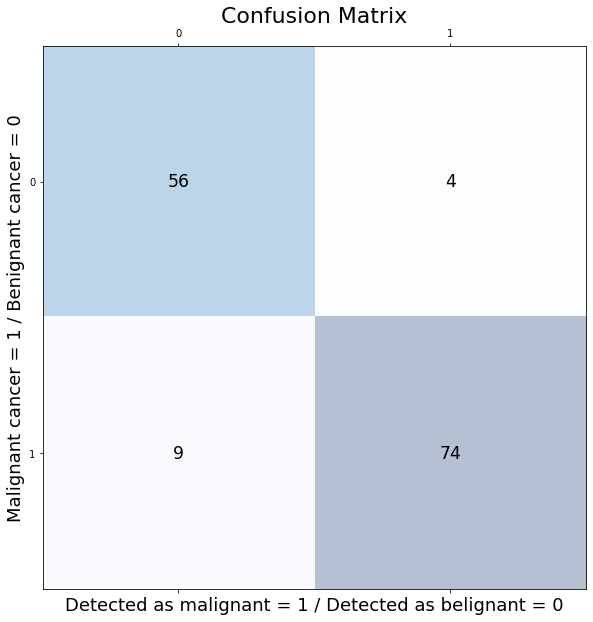

In [5]:
#Confusion matrix
conf_matrix = confusion_matrix(classes_test, predictions)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Detected as malignant = 1 / Detected as belignant = 0', fontsize=18)
plt.ylabel('Malignant cancer = 1 / Benignant cancer = 0', fontsize=18)
plt.title('Confusion Matrix', fontsize=22)
plt.show()

In [6]:
precision_keras = classifier.evaluate(predictions_test, classes_test)
precision_keras

5/5 [==============================] - 0s 1ms/step - loss: 0.2497 - binary_accuracy: 0.9091


[0.2496514767408371, 0.9090909361839294]